# 02 - Clustering

###### Here, to support the Exploratory Analysis, clustering tools were used for visualizing patterns in dataset features. These techniques were influenced by dataset asymmetric nature and the needs of finding links between the dataset features
---

#### Loading Packages and Database
----

In [11]:
import plotly.io as pio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# import fast_dummies
from sklearn.cluster import KMeans, DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy import stats
from scipy.stats import triang, gaussian_kde
import os
import sys
from pathlib import Path

In [12]:
# Adicionar o diretório 'modules_py' ao sys.path
modules_path = Path("modules_py").resolve()
sys.path.append(str(modules_path))

from data_cleaning import DataCleaning_MyData, DataCleaning_GroupData, DataCleaning_OffCod, DataCleaning_frequents, DataCleaning_dummies

try:
    # Executar a função principal de limpeza de dados
    my_data = DataCleaning_MyData()
    clean_media = DataCleaning_GroupData()
    OffCod_Agru = DataCleaning_OffCod()
    mais_frequentes = DataCleaning_frequents()
    dummies = DataCleaning_dummies()
    
    print("Dados processados com sucesso!")
    
    # Aqui pode verificar o conteúdo de cada tabela gerada no código
    display(my_data)


# Mostrar o erro caso não execute
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Dados processados com sucesso!


,Fonte,OFFCod,OFFEscopo,SomaDeHorasApontadas,Andrea_DEPARTAMENTO.Descricao,QuantidadePedida,TipodeProduto,PRODUTOS.Codigo,Produto.Nome,ITENS.Codigo,ITENS.Descricao,Poder Linear,Poder Z,Capacidade(TSS/D),Cap Normal Linear,Cap Normal Z,Evaporacao(T/H),Evap Normal Linear,Evap Normal Z,SomaDeHorasApontadasUnitario
0,PropostaAjustada,66,1 x WHB + SH + ECO,4030.0,CONFORMACAO,1.0,Caldeira,16.0,CRCHRSG,1123.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4030.0
1,PropostaAjustada,66,1 x WHB + SH + ECO,66.0,CONFORMACAO,1.0,Caldeira,16.0,CRCHRSG,1124.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,66.0
2,PropostaAjustada,66,1 x WHB + SH + ECO,2970.0,CONFORMACAO,1.0,Caldeira,16.0,CRCHRSG,1132.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2970.0
3,PropostaAjustada,71,2 x CALDEIRAS 250 T/H,27027.0,CONFORMACAO,2.0,Caldeira,15.0,CQOG,1132.0,NaN,66.0,156.0,NaN,NaN,NaN,250.0,1.0,2.0,13513.5
4,PropostaAjustada,115,1 X CALDEIRA 180 T/H,48.0,CONFORMACAO,1.0,Caldeira,16.0,CRCHRSG,1124.0,NaN,46.0,59.0,NaN,NaN,NaN,180.0,0.0,1.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,Fibria,Fibria,CRQ,19023.0,MONTAGEM,1.0,Caldeira,14.0,CRQ,1152.0,Bloco (Tubos) do Economizador,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,19023.0
2434,Fibria,Fibria,CRQ,23736.0,SOLDA,1.0,Caldeira,14.0,CRQ,1132.0,Super aquecedor interno#,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,23736.0
2435,Fibria,Fibria,CRQ,25853.0,CONFORMACAO,1.0,Caldeira,14.0,CRQ,1132.0,Super aquecedor interno#,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,25853.0
2436,Fibria,Fibria,CRQ,34050.0,MONTAGEM,1.0,Caldeira,14.0,CRQ,1122.0,Paines da fornalha,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,34050.0


#### Building Clustering Model
###### - Using Principal Component Analysis (PCA) for dimensionality reduction
###### - Clustering Techniques: K-Means and DBSCAN
----

In [13]:
# Separando colunas categóricas e numéricas a serem utilizadas

num_features = ["SomaDeHorasApontadasUnitario"]
cat_features = ["Fonte", "Andrea_DEPARTAMENTO.Descricao", "TipodeProduto", "Produto.Nome" ]

# Pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)

# Pipeline completo para K-Means
pipeline_kmeans = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

# Ajuste e predição com K-Means
my_data['cluster_kmeans'] = pipeline_kmeans.fit_predict(my_data)

# Configuração para DBSCAN
X_preprocessed = preprocessor.fit_transform(my_data)

dbscan = DBSCAN(eps=1.8, min_samples=10, metric='euclidean')
my_data['cluster_dbscan'] = dbscan.fit_predict(X_preprocessed)


# Configurando PCA (para redução de dimensionalidade)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

#### Visualizing Clustering Model

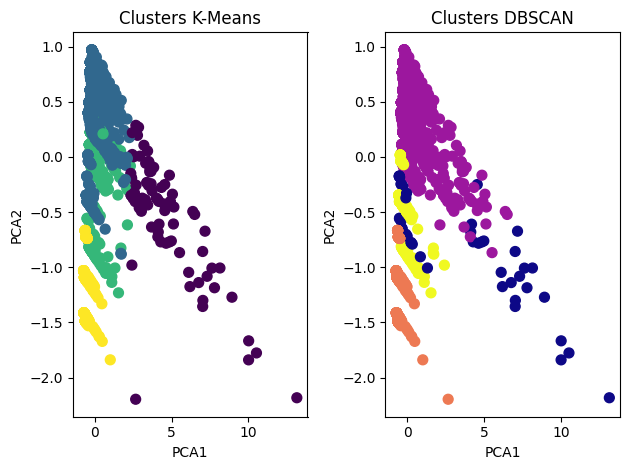

Clusters K-Means:
cluster_kmeans
0      78
1    1282
2     616
3     452
dtype: int64

Clusters DBSCAN:
cluster_dbscan
-1      48
 0    1729
 1     453
 2     198
dtype: int64


In [14]:
# Visualização K-Means
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=my_data['cluster_kmeans'], cmap='viridis', s=50)
plt.title('Clusters K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Visualização DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=my_data['cluster_dbscan'], cmap='plasma', s=50)
plt.title('Clusters DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()

# Exibindo resultados
print("Clusters K-Means:")
print(my_data.groupby('cluster_kmeans').size())

print("\nClusters DBSCAN:")
print(my_data.groupby('cluster_dbscan').size())

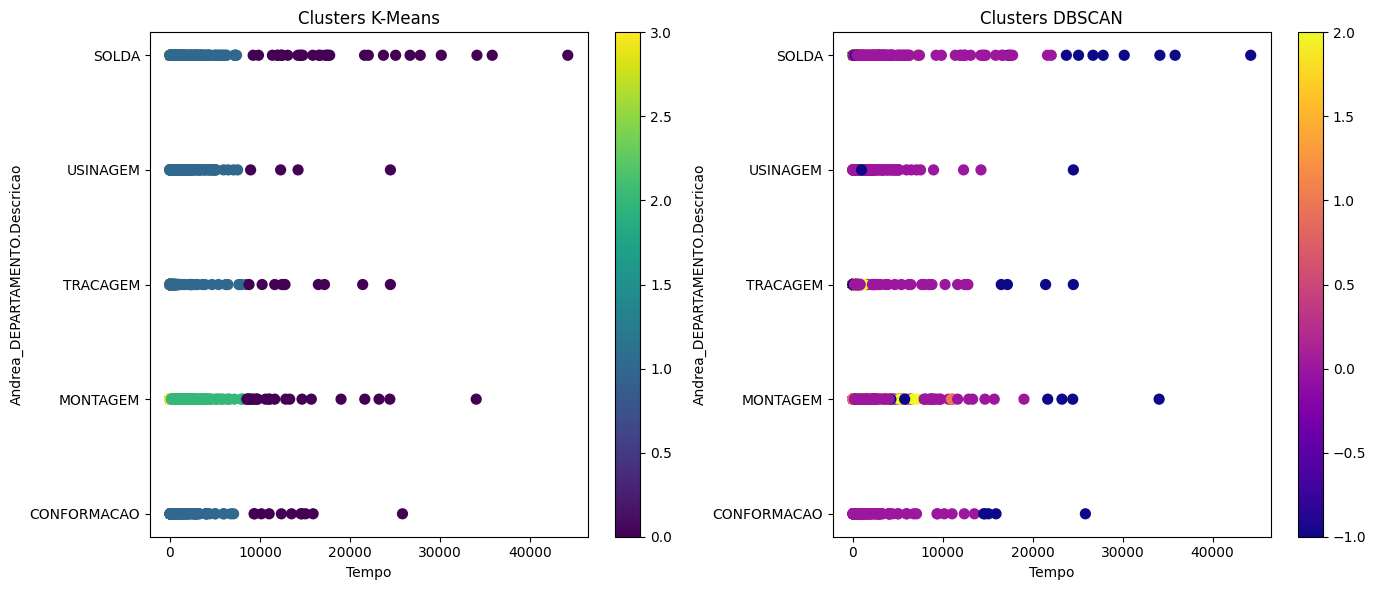

In [15]:
# Gráficos de dispersão comparativos para features originais
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico comparativo para clusters K-Means
scatter_kmeans = axes[0].scatter(
    my_data['SomaDeHorasApontadasUnitario'], my_data['Andrea_DEPARTAMENTO.Descricao'], c=my_data['cluster_kmeans'], cmap='viridis', s=50
)
axes[0].set_title('Clusters K-Means')
axes[0].set_xlabel('Tempo')
axes[0].set_ylabel('Andrea_DEPARTAMENTO.Descricao')
fig.colorbar(scatter_kmeans, ax=axes[0])

# Gráfico comparativo para clusters DBSCAN
scatter_dbscan = axes[1].scatter(
    my_data['SomaDeHorasApontadasUnitario'], my_data['Andrea_DEPARTAMENTO.Descricao'], c=my_data['cluster_dbscan'], cmap='plasma', s=50
)
axes[1].set_title('Clusters DBSCAN')
axes[1].set_xlabel('Tempo')
axes[1].set_ylabel('Andrea_DEPARTAMENTO.Descricao')
fig.colorbar(scatter_dbscan, ax=axes[1])

plt.tight_layout()
plt.show()